In [1]:
import subprocess
import itertools
import pandas as pd
import os
import threading
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
# Check if results.csv exists and load existing results
if os.path.exists("C:\\inz\\GeneticSudokuSolver\\resultsHard.csv"):
    df_existing = pd.read_csv("C:\\inz\\GeneticSudokuSolver\\resultsHard.csv")
    results = df_existing.to_dict('records')
    last_run = df_existing.iloc[-1]
    last_combination = (last_run['log_level'], last_run['sudoku_path'], last_run['population_size'], last_run['mutation_rate'], last_run['fittest_rate'], last_run['reset_counter'])
    last_iteration = last_run['iteration']
    print(f"Loaded {len(results)} existing results. Last run: {last_combination}, iteration {last_iteration}")
    start_iteration = last_iteration + 1
print(df_existing.head())

Loaded 6720 existing results. Last run: ('ERR', './testData/1hard.txt', 2000, 0.02, 0.5, 50), iteration 10
  log_level           sudoku_path  population_size  mutation_rate  \
0       ERR  ./testData/1hard.txt              100            0.1   
1       ERR  ./testData/1hard.txt              100            0.1   
2       ERR  ./testData/1hard.txt              100            0.1   
3       ERR  ./testData/1hard.txt              100            0.1   
4       ERR  ./testData/1hard.txt              100            0.1   

   fittest_rate  reset_counter  iteration  \
0           0.2            100          1   
1           0.2            100          2   
2           0.2            100          3   
3           0.2            100          4   
4           0.2            100          5   

                                         mean_values  \
0  [43.029999, 39.48, 38.189999, 36.380001, 33.93...   
1  [41.200001, 39.490002, 37.290001, 35.790001, 3...   
2  [41.580002, 39.799999, 36.810001, 35

In [ ]:
filtered_df = df_existing[df_existing['best_is_zero'] == True]

     log_level           sudoku_path  population_size  mutation_rate  \
4565       ERR  ./testData/1hard.txt             1000           0.10   
6034       ERR  ./testData/1hard.txt             2000           0.08   
6047       ERR  ./testData/1hard.txt             2000           0.08   
6652       ERR  ./testData/1hard.txt             2000           0.02   
6677       ERR  ./testData/1hard.txt             2000           0.02   

      fittest_rate  reset_counter  iteration  \
4565           0.3            200          6   
6034           0.4            200          5   
6047           0.4            300          8   
6652           0.5            100          3   
6677           0.5            300          8   

                                            mean_values  \
4565  [42.534, 41.041, 39.936001, 38.720001, 37.612,...   
6034  [43.220001, 41.970001, 40.987, 40.0555, 39.339...   
6047  [43.306, 41.937, 40.956501, 40.0075, 39.25, 38...   
6652  [43.265499, 41.771999, 40.435501, 39

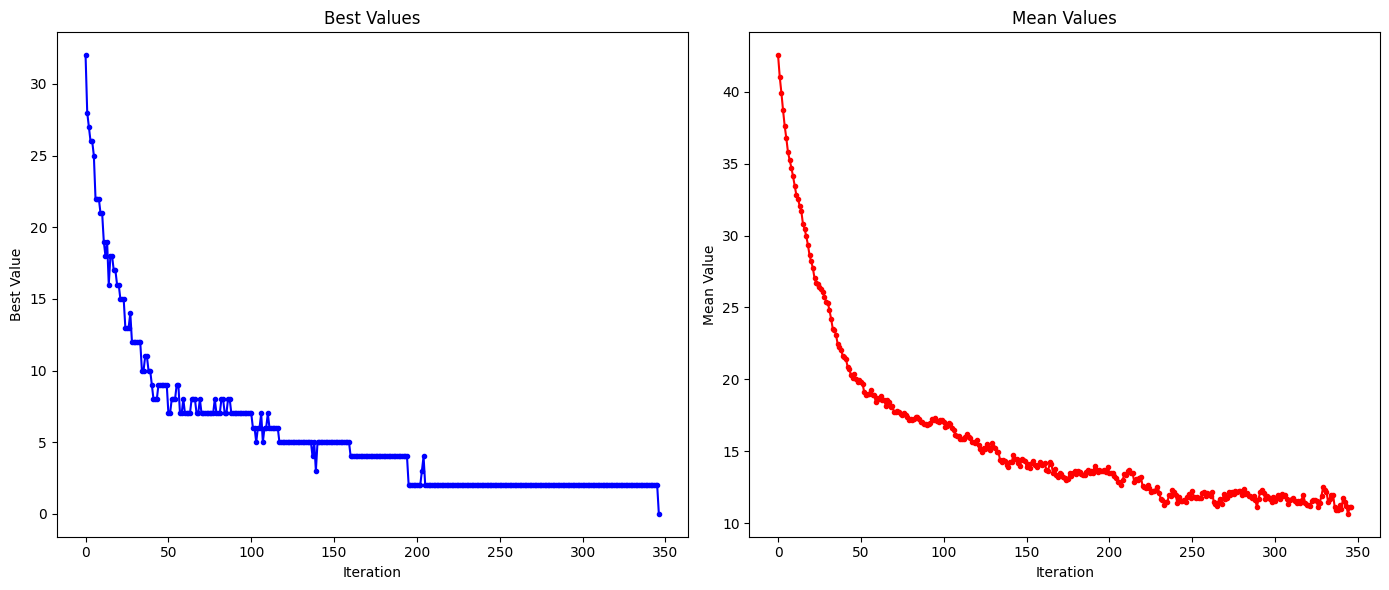

In [12]:
first_record = filtered_df.iloc[0]

# Extract best values and mean values
best_values = first_record['best_values']
mean_values = first_record['mean_values']

# Convert the string representation of lists to actual lists
import ast
best_values = ast.literal_eval(best_values)
mean_values = ast.literal_eval(mean_values)

# Create the plots
plt.figure(figsize=(14, 6))

# Plot best values
plt.subplot(1, 2, 1)
plt.plot(best_values, marker='o', linestyle='-', color='b',markersize=3)
plt.title('Best Values')
plt.xlabel('Iteration')
plt.ylabel('Best Value')

# Plot mean values
plt.subplot(1, 2, 2)
plt.plot(mean_values, marker='o', linestyle='-', color='r', markersize=3)
plt.title('Mean Values')
plt.xlabel('Iteration')
plt.ylabel('Mean Value')

plt.tight_layout()
plt.show()